# 학습데이터, 테스트데이터 만들기

In [ ]:
import codecs 

positive = [] 
negative = [] 
posneg = [] 

pos = codecs.open("/content/drive/My Drive/Colab Notebooks/positive_words_self.txt", 'rb', encoding='UTF-8') 

while True: 
  line = pos.readline() 
  line = line.replace('\n', '') 
  positive.append(line) 
  posneg.append(line) 
  
  if not line: break 
pos.close() 

neg = codecs.open("/content/drive/My Drive/Colab Notebooks/negative_words_self.txt", 'rb', encoding='UTF-8') 

while True: 
  line = neg.readline() 
  line = line.replace('\n', '') 
  negative.append(line) 
  posneg.append(line) 
  
  if not line: break 
  
neg.close()



In [ ]:
import requests 
from bs4 import BeautifulSoup 
import re 
import pandas as pd 

label = [0] * 4000 

my_title_dic = {"title":[], "label":label} 

j = 0 

for i in range(400): 
  num = i * 10 + 1 
  # bhc 
  # url = "https://search.naver.com/search.naver?&where=news&query=bhc&sm=tab_pge&sort=0&photo=0&field=0&reporter_article=&pd=0&ds=&de=&docid=&nso=so:r,p:all,a:all&mynews=0&cluster_rank=23&start=" + str(num) 
  # 아오리라멘
  # url2 = "https://search.naver.com/search.naver?&where=news&query=%EC%95%84%EC%98%A4%EB%A6%AC%EB%9D%BC%EB%A9%98&sm=tab_pge&sort=0&photo=0&field=0&reporter_article=&pd=0&ds=&de=&docid=&nso=so:r,p:all,a:all&mynews=0&cluster_rank=34&start=" + str(num) 
  
  # 버거킹 
  url3 = "https://search.naver.com/search.naver?&where=news&query=%EB%B2%84%EA%B1%B0%ED%82%B9&sm=tab_pge&sort=0&photo=0&field=0&reporter_article=&pd=0&ds=&de=&docid=&nso=so:r,p:all,a:all&mynews=0&cluster_rank=23&start=" + str(num) 
  
  req = requests.get(url3) 
  
  soup = BeautifulSoup(req.text, 'lxml') 
  
  titles = soup.select("a._sp_each_title") 
  
  for title in titles: 
    
    title_data = title.text 
    title_data = re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…\"\“》]', '', title_data) 
    my_title_dic['title'].append(title_data) 
    
    for i in range(len(posneg)): 
      posflag = False 
      negflag = False 
      if i < (len(positive)-1): 
        # print(title_data.find(posneg[i])) 
        if title_data.find(posneg[i]) != -1: 
          posflag = True 
          print(i, "positive?","테스트 : ",title_data.find(posneg[i]),"비교단어 : ", posneg[i], "인덱스 : ", i, title_data) 
          break 
      if i > (len(positive)-2): 
        if title_data.find(posneg[i]) != -1: 
          negflag = True 
          print(i, "negative?","테스트 : ",title_data.find(posneg[i]),"비교단어 : ", posneg[i], "인덱스 : ", i, title_data) 
          break 
    
    if posflag == True: 
      label[j] = 1 
      # print("positive", j) 
    elif negflag == True: 
      label[j] = -1 
      # print("negative", j) 
    elif negflag == False and posflag == False: 
      label[j] = 0 
      # print("objective", j) 
    j = j + 1 
my_title_dic['label'] = label 
my_title_df = pd.DataFrame(my_title_dic)



8 positive? 테스트 :  10 비교단어 :  인기 인덱스 :  8 버거킹 30일까지 인기 와퍼 2개에 7천원
46 negative? 테스트 :  0 비교단어 :   인덱스 :  46 이 조합 가능” 현재 난리 난 버거킹기네스 콜라보
14 positive? 테스트 :  24 비교단어 :  1위 인덱스 :  14 버거킹 프리미엄브랜드지수 패스트푸드점 부문 1위
8 positive? 테스트 :  10 비교단어 :  인기 인덱스 :  8 버거킹 30일까지 인기 와퍼 2개에 7000원
46 negative? 테스트 :  0 비교단어 :   인덱스 :  46 가성비 갑’ 맘스터치의 변심 이러다 탈 날라
46 negative? 테스트 :  0 비교단어 :   인덱스 :  46 언택트 리더 유정범 메쉬코리아 대표 IT 기술력으로 물류 혁신 이끌 것”
46 negative? 테스트 :  0 비교단어 :   인덱스 :  46 정보톡톡 1일 1깡 묻고 더블로밈이 뭐길래
46 negative? 테스트 :  0 비교단어 :   인덱스 :  46 버거킹 와퍼·불고기와퍼 단품 3500원에 할인 판매
46 negative? 테스트 :  0 비교단어 :   인덱스 :  46 서울 강동구 김정래이비인후과 방문자 검사 받아야
46 negative? 테스트 :  0 비교단어 :   인덱스 :  46 식수·햄버거 포장재에 함유된 발암물질 PFAS국내는 아직 이상없어도 
46 negative? 테스트 :  0 비교단어 :   인덱스 :  46 버거킹 언제 어디서나 스탬프 적립하고 무료 와퍼 세트 받자
46 negative? 테스트 :  0 비교단어 :   인덱스 :  46 빅4 햄버거 중 롯데리아 관심도 유일 상승
17 positive? 테스트 :  27 비교단어 :  오픈 인덱스 :  17 버거킹 온·오프라인 통합 적립 서비스 킹 스탬프 오픈
46 negative? 테스트 :  0 비교단어 :   인덱스 :  46 기업 소식 CJ제일제당 수산 HMR 시장 본격 확대 外
46 negativ

In [ ]:
def dftoCsv(my_title_df, num): 
  my_title_df.to_csv(('./title_datas'+ str(num) +'.csv'), sep=',', na_rep='NaN', encoding='utf-8')


# 데이터 분석하기

In [ ]:
import pandas as pd 

train_data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/train_dataset_1007.csv") 
test_data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/test_dataset_1007.csv")


In [ ]:
%matplotlib inline 
import matplotlib.pyplot as plt



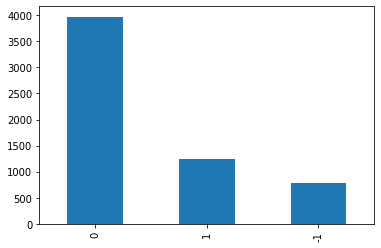

In [ ]:
train_data['label'].value_counts().plot(kind='bar')

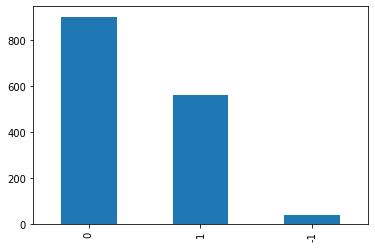

In [ ]:
test_data['label'].value_counts().plot(kind='bar')

In [ ]:
print(train_data.groupby('label').size().reset_index(name='count')) 
print(test_data.groupby('label').size().reset_index(name='count'))



   label  count
0     -1    791
1      0   3971
2      1   1238
   label  count
0     -1     40
1      0    900
2      1    560


# 모델을 만들기 위한 데이터 전처리 작업

In [ ]:
stopwords = ['의', '가', '이', '은', '들', '는', '좀', '잘', '걍', '과', '도', '를', '으로', '자', '에', '와', '한', '하다']

In [ ]:
# https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install pydot
import pydot

In [ ]:
!pip install konlpy
!pip install kss
!pip install nltk

In [ ]:
import konlpy 
from konlpy.tag import Okt 
okt = Okt() 
X_train = [] 
for sentence in train_data['title']: 
  temp_X = [] 
  temp_X = okt.morphs(sentence, stem=True) # 토큰화 
  temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거 
  X_train.append(temp_X) 
  
X_test = [] 
for sentence in test_data['title']: 
  temp_X = [] 
  temp_X = okt.morphs(sentence, stem=True) # 토큰화 
  temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거 
  X_test.append(temp_X)


In [ ]:
from keras.preprocessing.text import Tokenizer 
max_words = 35000 
tokenizer = Tokenizer(num_words = max_words) 
tokenizer.fit_on_texts(X_train) 
X_train = tokenizer.texts_to_sequences(X_train) 
X_test = tokenizer.texts_to_sequences(X_test)



제목의 최대 길이 :  17
제목의 평균 길이 :  8.979333333333333


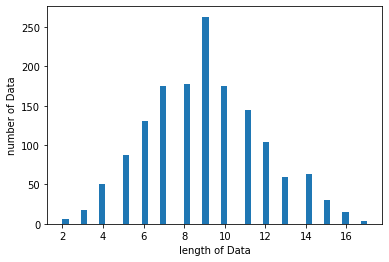

In [ ]:
print("제목의 최대 길이 : ", max(len(l) for l in X_test)) 
print("제목의 평균 길이 : ", sum(map(len, X_test))/ len(X_test))
plt.hist([len(s) for s in X_test], bins=50) 
plt.xlabel('length of Data') 
plt.ylabel('number of Data') 
plt.show()


In [ ]:
import numpy as np 

y_train = [] 
y_test = [] 

for i in range(len(train_data['label'])): 
  if train_data['label'].iloc[i] == 1: 
    y_train.append([0, 0, 1]) 
  elif train_data['label'].iloc[i] == 0: 
    y_train.append([0, 1, 0]) 
  elif train_data['label'].iloc[i] == -1: 
    y_train.append([1, 0, 0]) 

for i in range(len(test_data['label'])): 
  if test_data['label'].iloc[i] == 1: 
    y_test.append([0, 0, 1]) 
  elif test_data['label'].iloc[i] == 0: 
    y_test.append([0, 1, 0]) 
  elif test_data['label'].iloc[i] == -1: 
    y_test.append([1, 0, 0]) 
    
y_train = np.array(y_train) 
y_test = np.array(y_test)



# 모델 만들기

In [ ]:
from keras.layers import Embedding, Dense, LSTM 
from keras.models import Sequential 
from keras.preprocessing.sequence import pad_sequences 
max_len = 20 # 전체 데이터의 길이를 20로 맞춘다 

X_train = pad_sequences(X_train, maxlen=max_len) 
X_test = pad_sequences(X_test, maxlen=max_len)



In [ ]:
model = Sequential() 
model.add(Embedding(max_words, 100)) 
model.add(LSTM(128)) 
model.add(Dense(3, activation='softmax')) 

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy']) 
history = model.fit(X_train, y_train, epochs=10, batch_size=10, validation_split=0.1)



Epoch 1/10
540/540 [==============================] - 20s 37ms/step - loss: 0.4447 - accuracy: 0.8354 - val_loss: 0.4064 - val_accuracy: 0.8917
Epoch 2/10
540/540 [==============================] - 19s 35ms/step - loss: 0.1300 - accuracy: 0.9611 - val_loss: 0.1967 - val_accuracy: 0.9600
Epoch 3/10
540/540 [==============================] - 19s 35ms/step - loss: 0.0784 - accuracy: 0.9791 - val_loss: 0.1917 - val_accuracy: 0.9617
Epoch 4/10
540/540 [==============================] - 19s 35ms/step - loss: 0.0485 - accuracy: 0.9874 - val_loss: 0.2594 - val_accuracy: 0.9400
Epoch 5/10
540/540 [==============================] - 19s 35ms/step - loss: 0.0356 - accuracy: 0.9898 - val_loss: 0.2150 - val_accuracy: 0.9633
Epoch 6/10
540/540 [==============================] - 19s 35ms/step - loss: 0.0265 - accuracy: 0.9930 - val_loss: 0.2286 - val_accuracy: 0.9533
Epoch 7/10
540/540 [==============================] - 19s 35ms/step - loss: 0.0194 - accuracy: 0.9946 - val_loss: 0.3078 - val_accuracy:

In [ ]:
predict = model.predict(X_test)

In [ ]:
import numpy as np 
predict_labels = np.argmax(predict, axis=1) 
original_labels = np.argmax(y_test, axis=1)


In [ ]:
for i in range(30):
   print("기사제목 : ", test_data['title'].iloc[i], "/\t 원래 라벨 : ", original_labels[i], "/\t예측한 라벨 : ", predict_labels[i])



기사제목 :  더벨맘스터치 가맹점포 롯데리아 앞질러1위 우뚝 /	 원래 라벨 :  2 /	예측한 라벨 :  2
기사제목 :  롯데리아도 맘스터치도 패스트푸드점 위생적발 5년간 50 증가 /	 원래 라벨 :  2 /	예측한 라벨 :  0
기사제목 :  맘스터치 도시락 한 달만에 3만개 완판잘 나가는 치킨 프랜차이즈 간편식 /	 원래 라벨 :  1 /	예측한 라벨 :  1
기사제목 :  맘스터치 먹고 뉴이스트 · 옹성우 · 여자친구 보러가자 /	 원래 라벨 :  1 /	예측한 라벨 :  1
기사제목 :  MTM터치 연중기획공연12세계의 음악도시 오스틴 내슈빌 아바나 /	 원래 라벨 :  1 /	예측한 라벨 :  1
기사제목 :  기로에 선 자영업자 그래도 해법은 있다 /	 원래 라벨 :  1 /	예측한 라벨 :  1
기사제목 :  단독 지금도 맥도날드서 벌레·이물질 줄줄줄반년새 21건 포스팅 충격 /	 원래 라벨 :  0 /	예측한 라벨 :  0
기사제목 :  엄지족 잡아라패스트푸드도 배달 경쟁 가세 /	 원래 라벨 :  1 /	예측한 라벨 :  1
기사제목 :  더벨강소 외식프랜차이즈 리포트해마로푸드 가격·품질 두마리 토끼 잡 /	 원래 라벨 :  1 /	예측한 라벨 :  1
기사제목 :  맘스터치 펩시 콘서트 입장권 증정 이벤트 /	 원래 라벨 :  1 /	예측한 라벨 :  1
기사제목 :  국내서 1위 쫓는 해마로푸드서비스 맘스터치’해외 사업은 지지부진 /	 원래 라벨 :  2 /	예측한 라벨 :  2
기사제목 :  붐바타 창업박람회 참가제2의 맘스터치 시동건다 /	 원래 라벨 :  1 /	예측한 라벨 :  1
기사제목 :  해마로푸드 붐바타로 제2의 맘스터치 시동건다 /	 원래 라벨 :  1 /	예측한 라벨 :  1
기사제목 :  맘스터치 군대스리가 예비군편’ 추가 진행 /	 원래 라벨 :  1 /	예측한 라벨 :  1
기사제목 :  맘스터치 뉴미디어 통해 기부나눔 알리다 /	 원래 라벨 :  2 /	예측한 라벨 :  2
기사제목 :  맘스터치 필리핀 진출